In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data

In [2]:
datahw01 = pd.read_csv('datasethw01.csv')

In [3]:
datahw01.size, datahw01.shape

(8361, (929, 9))

In [9]:
datahw01.head()

,Date Of Test,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s),MOS
0,2017-07-01 00:02:57,-61,68.769997,1855.54,90.0,1,1,0.45,3
1,2017-07-01 00:05:29,-71,69.169998,1685.62,90.0,1,1,0.51,2
2,2017-07-01 00:08:02,-65,69.279999,1770.92,90.0,1,1,0.00,1
3,2017-07-01 00:10:30,-103,0.820000,256.07,60.0,1,1,3.35,4
4,2017-07-01 00:10:37,-61,68.860001,452.50,90.0,1,1,0.00,1


## Unconditional mono-variate analysis

In [219]:
unc_monovar = datahw01.describe().iloc[1:3,:-1].append(datahw01.skew()[:-1], ignore_index=True)
unc_monovar.index = ['Mean $\mu_d$','std $\sigma_d$','Skewness $\gamma_d$']
unc_monovar

,Signal (dBm),Speed (m/s),Distance from site (m),Call Test Duration (s),Call Test Result,Call Test Technology,Call Test Setup Time (s)
Mean $\mu_d$,-100.162540,8.266168,1.351003,102.613886,0.988159,1.665231,1.179569
std $\sigma_d$,17.206732,18.557894,3.370051,97.257257,0.108227,0.517878,1.474385
Skewness $\gamma_d$,0.683338,2.659948,8.142499,4.779568,-9.040485,-1.183276,2.472588


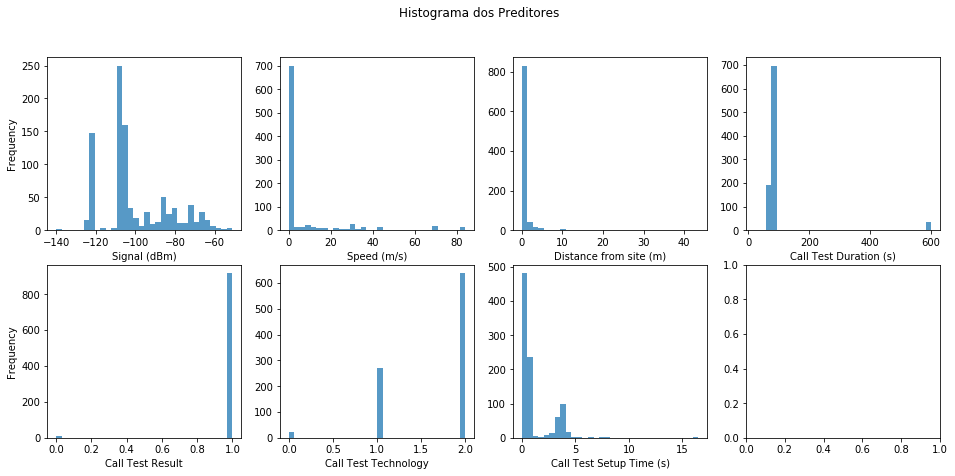

In [220]:
fig, ax = plt.subplots(2, 4, figsize=(16, 7)) 
ax = ax.ravel()
fig.suptitle('Histograma dos Preditores')
for i in range(1, 8):
    ax[i-1].set_xlabel(datahw01.columns[i])
    ax[0].set_ylabel('Frequency')
    ax[4].set_ylabel('Frequency')
    ax[i-1].hist(datahw01.iloc[:, i], bins=32, alpha=.75)

## Class-conditional mono-variate analysis

In [288]:
# cls = datahw01.groupby('MOS')
# for idx, group in cls:
#      = group.describe().iloc[1:3,:-1].append(cls.get_group(i).skew()[:-1], ignore_index=True)
    
# cls_monovar1 = cls.get_group(1).describe().iloc[1:3,:-1].append(cls.get_group(1).skew()[:-1], ignore_index=True)
# cls_monovar2 =
# cls_monovar3
# cls_monovar4
# cls = datahw01.groupby('MOS')
# cls.get_group(1)


MOS,1,2,3,4
Signal (dBm),-79.051282,-77.434783,-77.31200,-106.734353
Speed (m/s),39.292820,30.456957,13.01176,4.338470
Distance from site (m),5.202476,4.454508,1.15321,0.977923
Call Test Duration (s),118.362564,281.880435,96.38232,91.373950
Call Test Result,0.948718,0.956522,0.99200,0.991655
Call Test Technology,0.897436,0.826087,0.97600,1.880389
Call Test Setup Time (s),1.026667,0.700435,3.28248,0.852921


MOS,1,2,3,4
Signal (dBm),12.810252,13.245800,11.626177,12.173208
Speed (m/s),32.930717,22.321566,19.475256,13.703765
Distance from site (m),9.918787,5.967386,1.913614,2.244750
Call Test Duration (s),141.814374,249.041183,126.138810,48.171649
Call Test Result,0.223456,0.206185,0.089443,0.091032
Call Test Technology,0.307355,0.383223,0.199354,0.345511
Call Test Setup Time (s),1.543622,1.341621,1.923854,1.019200


MOS,1,2,3,4
Signal (dBm),-0.295257,-0.294164,-0.489714,0.921655
Speed (m/s),0.060054,0.633495,2.020426,4.067270
Distance from site (m),2.623576,1.939315,3.163911,14.630076
Call Test Duration (s),3.223005,0.501328,3.696230,9.915876
Call Test Result,-4.233256,-4.629568,-11.180340,-10.831947
Call Test Technology,-2.725964,-1.779168,-2.734524,-2.844751
Call Test Setup Time (s),1.026515,2.038377,2.069659,2.708839


MOS
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
3    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
4    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

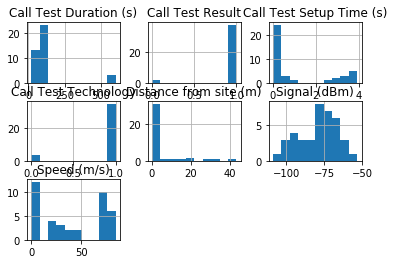

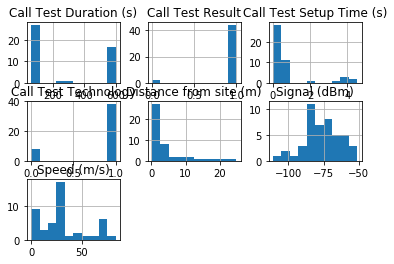

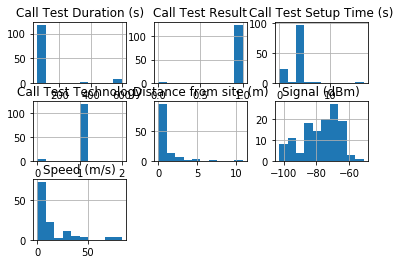

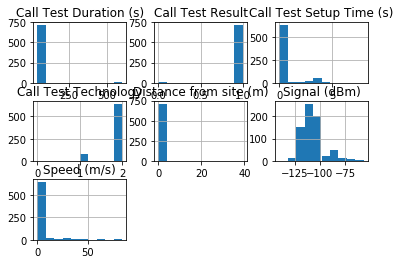

In [318]:
cls = datahw01.groupby('MOS')
display(cls.mean().T)
display(cls.std().T)
display(cls.skew().T)
cls.hist()

### Informações

 - Dados:

929 observações e 9 colunas, totalizando size=8370 com 7 preditores e 4 classes

1 = sucesso no teste = 919  
0 = falhas no teste  = 11

- Preditores:

```['Signal (dBm)', 'Speed (m/s)', 'Distance from site (m)', 'Call Test Duration (s)', 'Call Test Result', 'Call Test Technology' , 'Call Test Setup Time (s)']```

- Tecnologias:

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 0  | GSM  | 21 |
| 1  | UMTS  | 270 |
| 2  | LTE  | 639 |


- Classes MOS

4 classes no dataset: 

| Rating  | Label | Total|
| ------------- | ------------- | ------------- |
| 1  | Bad  | 39 |
| 2  | Poor  | 47 |
| 3  | Fair  | 125 |
| 4  | Good  | 719 |

https://en.wikipedia.org/wiki/Mean_opinion_score

Links úteis:

https://pandas.pydata.org/pandas-docs/stable/reference/frame.html  
https://pandas.pydata.org/pandas-docs/stable/reference/series.html

In [5]:
# unicas ocorrencias
#datahw01['MOS'].nunique()
# busca por valores:
# for i in range(8):
#     print(datahw01.iloc[:,i+1].all()==0)
# grupos:
# grouped = datahw01.groupby('MOS')
# print('mos class:')
# for name, group in grouped:
#     print(name)
#     print(group.shape)